In [ ]:
!pip install lightkurve
!pip install spicy

In [ ]:
import lightkurve as lk
import numpy as np
import pandas as pd
import spicy
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from inspect import signature

In [ ]:
global number_of_characters
number_of_characters = 2
def get_equation(n_equation):
  if n_equation == 0:
    return linearfunc
  elif n_equation == 1:
    return sinfunc
  elif n_equation == -1:
    return skewsin
  else:
    return ntrigs

def linearfunc(time, a, b): #Associate integer = 0
  return a * time + b

def sinfunc(time, mean, amplitude, frequency, h_shift): #Associate integer = 1
  return amplitude * np.sin(frequency*time + h_shift) + mean

def skewsin(time, mean, amplitude, frequency, h_shift): #Associate integer = -1
  character1 = amplitude * np.cos(frequency*time + h_shift)
  character2 = (amplitude / 5) * np.sin(2*frequency*time + h_shift)
  return  character1 - character2 + mean

# Assuming 'equation' is used to define the model for curve fitting
def trig(x, a, b, c):
    return a * np.sin(b * x + c)

def ntrigs(time, mean, *params):
    result = mean
    for i in range(0, len(params), 3):
        result += trig(time, params[i], params[i+1], params[i+2])
    return result

In [ ]:
def normalize(data, minimum_data=None, maximum_data=None) -> list:
  if minimum_data == None:
    minimum_data = min(data)
  if maximum_data == None:
    maximum_data = max(data)
  return [(f - minimum_data) / (maximum_data - minimum_data) for f in data]

In [ ]:
def plot(domain, range, n_equation, parameters, size=(4,2), scatter = 5, add_margins=True, step_length=0.1):
  # Domain of the graphic visualization (x -axis).
  if add_margins:
    start_point = domain[0] -1
    end_point = domain[-1] + 1
  else:
    start_point = domain[0]
    end_point = domain[-1]
  x = np.arange(start_point, end_point, step_length)

  # Range and the function itself.
  equation = get_equation(n_equation)
  y = equation(x, *parameters)

  #Plotting
  plt.figure(figsize=size)
  plt.plot(x, y, "purple")
  plt.scatter(domain, range, s = scatter)
  plt.show()

## Download the Data.

In [ ]:
search = lk.search_lightcurve("KIC 9832235", mission = "Kepler")
search[0]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr009832235,0.0


In [ ]:
lightcurve = search[0].download()
star = lightcurve.to_pandas()
star

,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,...,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
time,,,,,,,,,,,,,,,,,,,,,
131.512133,15200.517578,5.355344,0,0.001139,32.368120,419.716114,1105,10270.300781,3.198522,313.378632,...,NaN,NaN,NaN,NaN,32.368120,0.000133,419.716114,0.000121,0.011798,-0.010884
131.532567,15195.247070,5.360495,0,0.001140,32.368298,419.715750,1106,10267.377930,3.198226,313.043732,...,NaN,NaN,NaN,NaN,32.368298,0.000133,419.715750,0.000120,0.011805,-0.010924
131.553002,15199.755859,5.355632,0,0.001141,32.368213,419.715850,1107,10270.215820,3.198484,313.236725,...,NaN,NaN,NaN,NaN,32.368213,0.000133,419.715850,0.000120,0.011941,-0.011066
131.573436,15189.259766,5.353740,0,0.001141,32.368264,419.716400,1108,10262.474609,3.197757,313.368683,...,NaN,NaN,NaN,NaN,32.368264,0.000133,419.716400,0.000121,0.011931,-0.011083
131.593870,15191.637695,5.354620,0,0.001142,32.367503,419.716326,1109,10265.097656,3.198110,313.303192,...,NaN,NaN,NaN,NaN,32.367503,0.000133,419.716326,0.000120,0.011402,-0.011011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164.901770,15153.568359,5.301619,0,0.002279,32.349899,419.725684,2739,10049.682617,3.171345,289.742645,...,NaN,NaN,NaN,NaN,32.349899,0.000134,419.725684,0.000122,-0.014240,0.012292
164.922204,15155.409180,5.309118,0,0.002280,32.350781,419.725780,2740,10052.774414,3.171373,288.822906,...,NaN,NaN,NaN,NaN,32.350781,0.000134,419.725780,0.000122,-0.013383,0.012213
164.942638,15157.708008,5.307152,0,0.002280,32.350053,419.725810,2741,10053.397461,3.171540,289.228699,...,NaN,NaN,NaN,NaN,32.350053,0.000134,419.725810,0.000122,-0.014074,0.012106


In [ ]:
star.dropna(subset=["flux"], inplace=True)
star.columns

Index(['flux', 'flux_err', 'quality', 'timecorr', 'centroid_col',
       'centroid_row', 'cadenceno', 'sap_flux', 'sap_flux_err', 'sap_bkg',
       'sap_bkg_err', 'pdcsap_flux', 'pdcsap_flux_err', 'sap_quality',
       'psf_centr1', 'psf_centr1_err', 'psf_centr2', 'psf_centr2_err',
       'mom_centr1', 'mom_centr1_err', 'mom_centr2', 'mom_centr2_err',
       'pos_corr1', 'pos_corr2'],
      dtype='object')

In [ ]:
def create_dataset():
  path = "/content/drive/My Drive/Cepheids/"
  dataframes_folder = path + "dataframes/"
  fluxes_folder = path + "fluxes/"

  for i in range(1, 1001):
    try:
      search_result = lk.search_lightcurve(f"Kepler-{i}", author="Kepler", cadence="long")
      lightcurve = search_result[0].download()
    except:
      print(f"Star number {i} file does not exist.")
      continue
    dataframe = lightcurve.to_pandas()
    dataframe.dropna(subset=["flux"], inplace=True)
    #flux_dataframe = dataframe[["flux"]]
    dataframe.to_csv(dataframes_folder+f'object{i}.csv')
    #flux_dataframe.to_csv(fluxes_folder+f'object{i}.csv')

## Traditional Fourier Analysis.

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

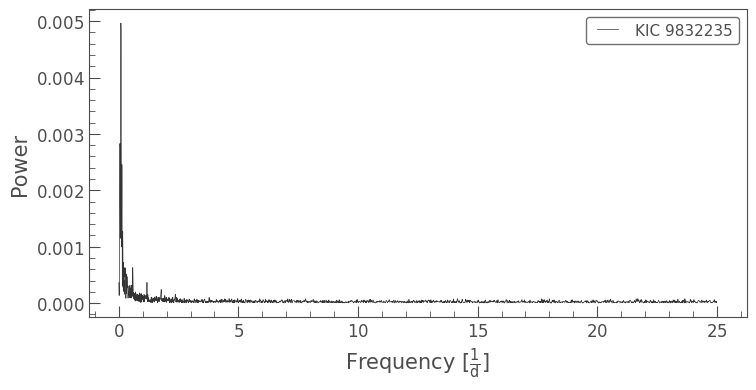

In [ ]:
periodogram = lightcurve.normalize().to_periodogram(maximum_frequency = 25)
periodogram.plot()

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

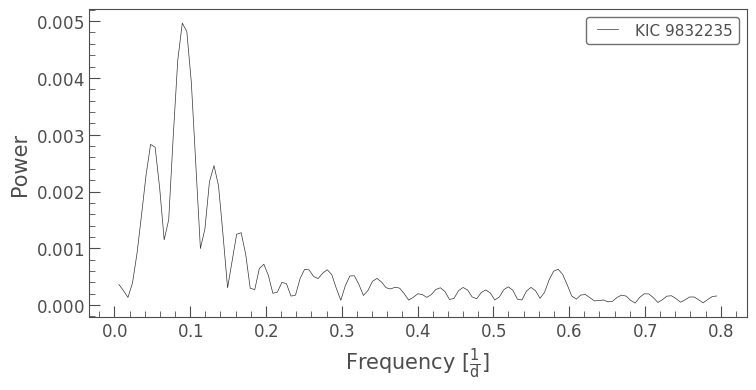

In [ ]:
periodogram = lightcurve.normalize().to_periodogram(maximum_frequency=0.8)
periodogram.plot()

In [ ]:
periodogram.period_at_max_power

<Quantity 11.15712448 d>

We can see a peak at 0.09 This means the main frecuency is aprox. 0.09 cycles per day. That is Aprox 1 cycle each 11 days. The is another peak at 0.05 cycles per day at half power and another at 0.13 cycles per day at half power.

## The Traditional Method.

In [ ]:
def traditional_get_loss(entries, values, mean, combined_amplitude, parameters, normalize_errors = True):
  entries = np.array(entries)
  values = np.array(values)
  prediction = ntrigs(entries, mean, *parameters)
  ptp = np.ptp(values)
  error1 = mean_absolute_error(values, prediction) / ptp * 100
  mask = (mean-combined_amplitude < values) & (values < mean+combined_amplitude)
  error2 = mean_squared_error(values[mask], prediction[mask]) / combined_amplitude
  if normalize_errors:
    error2 = error2 * 5
  return error1, error2

def traditional_predict(n_peaks, entries, values, normalize_errors=True, get_fourier=False):
  mean = np.mean(values)
  parameters = []
  entries = np.array(entries)
  values = np.array(values)
  N = len(entries)
  T = entries[1] - entries[0] #uniform spacing
  xf = spicy.fft.fftfreq(N, T)[:N//2]
  yfft = spicy.fft.fft(values-np.mean(values))
  yf = 2.0/N * np.abs(yfft[0:N//2])

  peak_indices1 = np.argsort(yf)[-n_peaks:]
  peak_amplitudes= []
  for i in peak_indices1:
    peak_amplitudes.append(yf[i])
  peak_amplitudes = sorted(peak_amplitudes, reverse=True)

  peak_indices2 = np.argsort(yf)[::-1][:n_peaks]
  peak_frequencies = xf[peak_indices2]

  horizontal_shifts = []
  for peak_frequency in peak_frequencies:
    horizontal_shift = 1 / peak_frequency
    horizontal_shifts.append(horizontal_shift)

  for i in range(n_peaks):
    parameters.append(peak_amplitudes[i])
    parameters.append(2.*np.pi*peak_frequencies[i])
    parameters.append(horizontal_shifts[i])

  combined_amplitude = sum(np.array(parameters[0::3])**2)**0.5  ##The module, euclidean inner product
  error1 = traditional_get_loss(entries, values, mean, combined_amplitude,  parameters, normalize_errors=normalize_errors)[0]
  error2 = traditional_get_loss(entries, values, mean, combined_amplitude,  parameters, normalize_errors=normalize_errors)[1]
  if get_fourier:
    return error1, error2, xf, yf, mean, combined_amplitude, *parameters
  else:
    return error1, error2, mean, combined_amplitude, *parameters

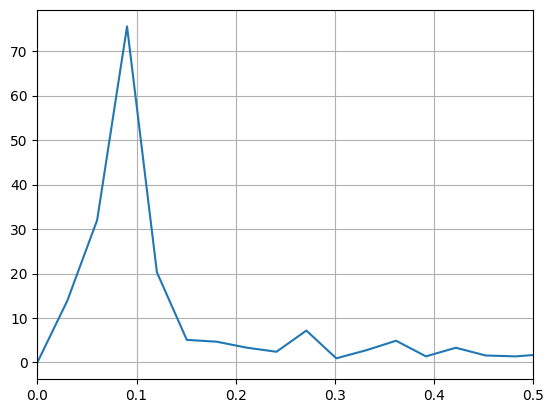

In [ ]:
plt.plot(prediction[2], prediction[3])
plt.xlim(0, 0.5)
plt.grid()
plt.show()

Absolute error: 8.070222612214065
Root masked error: 7.732671685207345


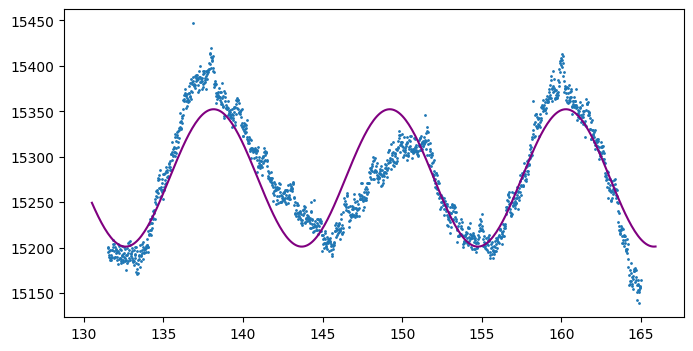

In [ ]:
number_of_characters = 1
time = list(star.index)
flux = list(star["flux"])
prediction = traditional_predict(number_of_characters, time, flux, get_fourier=True)
mean = prediction[4]
parameters = [mean]
parameters = parameters + list(prediction[6:])
print("Absolute error:", prediction[0])
print("Root masked error:", prediction[1]**0.5)
plot(time, flux, number_of_characters, parameters, size=(8, 4), scatter = 1)

Absolute error: 8.14778130893236
Root masked error: 7.320673809771287


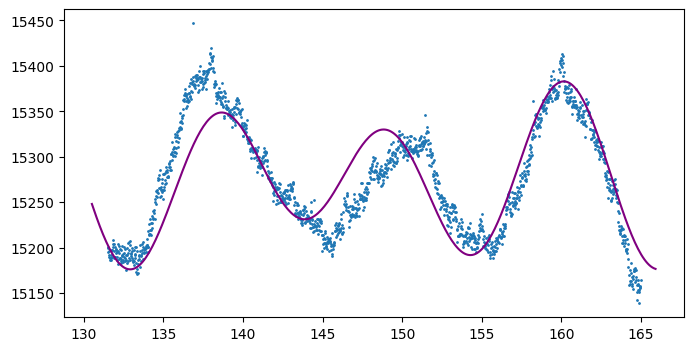

In [ ]:
number_of_characters = 2
time = list(star.index)
flux = list(star["flux"])
prediction = traditional_predict(number_of_characters, time, flux, get_fourier=True)
mean = prediction[4]
parameters = [mean]
parameters = parameters + list(prediction[6:])
print("Absolute error:", prediction[0])
print("Root masked error:", prediction[1]**0.5)
plot(time, flux, number_of_characters, parameters, size=(8, 4), scatter = 1)

Absolute error: 10.247354642282017
Root masked error: 9.016326105444715


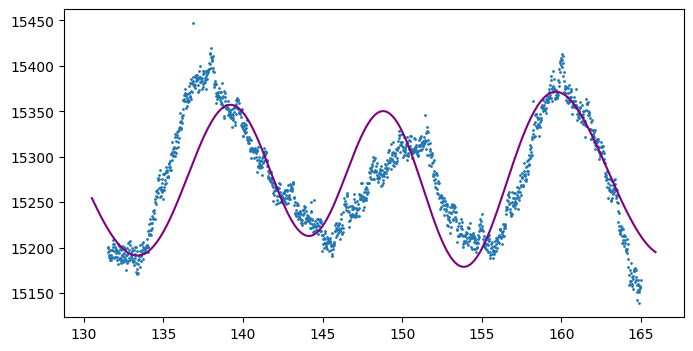

In [ ]:
number_of_characters = 3
time = list(star.index)
flux = list(star["flux"])
prediction = traditional_predict(number_of_characters, time, flux, get_fourier=True)
mean = prediction[4]
parameters = [mean]
parameters = parameters + list(prediction[6:])
print("Absolute error:", prediction[0])
print("Root masked error:", prediction[1]**0.5)
plot(time, flux, number_of_characters, parameters, size=(8, 4), scatter = 1)

In [ ]:
def start_traditional_predictions():
  information = []
  for index in range(1, 1001):
    try:
      dataframe = pd.read_csv(f"/content/drive/My Drive/Cepheids/fluxes/object{index}.csv")
    except FileNotFoundError:
      print("File "+str(index)+" was not found.")
      continue
    z = np.abs(spicy.stats.zscore(dataframe["flux"]))
    outlier_indices = np.where(z > 2)[0]
    dataframe.drop(outlier_indices, inplace=True)
    lower_values = dataframe[dataframe["flux"] < np.percentile(dataframe["flux"], 2)]
    dataframe.drop(lower_values.index, inplace=True)
    time = list(dataframe["time"])
    flux = list(dataframe["flux"])
    min_time = dataframe["time"].min()
    max_time = dataframe["time"].max()
    min_flux = dataframe["flux"].min()
    max_flux = dataframe["flux"].max()
    prediction = traditional_predict(3, time, flux, get_fourier=False)
    sinfunc_prediction = traditional_get_loss(time, flux, prediction[2], prediction[3], prediction[4:7])
    twotrigs_prediction = traditional_get_loss(time, flux, prediction[2], prediction[3], prediction[4:10])
    normalized_time = normalize(dataframe["time"], min_time, max_time)
    normalized_flux = normalize(dataframe["flux"], min_flux, max_flux)
    normalized_prediction = traditional_predict(3, normalized_time, normalized_flux, get_fourier=False)
    normalized_sinfunc_prediction = traditional_get_loss(normalized_time, normalized_flux, normalized_prediction[2],
                                                         normalized_prediction[3], normalized_prediction[4:7])
    normalized_twotrigs_prediction = traditional_get_loss(normalized_time, normalized_flux, normalized_prediction[2],
                                                          normalized_prediction[3], normalized_prediction[4:10])
    new_row = {"object":index,
               "min_time":min_time, "max_time":max_time, "min_flux":min_flux, "max_flux":max_flux,
               "error1":sinfunc_prediction[0], "masked_error1":sinfunc_prediction[1],
               "error2":twotrigs_prediction[0], "masked_error2":twotrigs_prediction[1],
               "error3":prediction[0], "masked_error3":prediction[1],
               "mean": prediction[2], "combined_amplitude": prediction[3],
               "amplitude1": prediction[4], "frequency1": prediction[5], "hshift1": prediction[6],
               "amplitude2": prediction[7], "frequency2": prediction[8], "hshift2": prediction[9],
               "amplitude3": prediction[10], "frequency3": prediction[11], "hshift3": prediction[12],

               "normalized_error1":normalized_sinfunc_prediction[0], "normalized_masked_error1":normalized_sinfunc_prediction[1],
               "normalized_error2":normalized_twotrigs_prediction[0], "normalized_masked_error2" :normalized_twotrigs_prediction[1],
               "normalized_error3":normalized_prediction[0], "normalized_masked_error3":normalized_prediction[1],
               "normalized_mean": normalized_prediction[2], "normalized_combined_amplitude": normalized_prediction[3],
               "normalized_amplitude1": normalized_prediction[4], "normalized_frequency1": normalized_prediction[5],
               "normalized_hshift1": normalized_prediction[6], "normalized_amplitude2": normalized_prediction[7],
               "normalized_frequency2": normalized_prediction[8], "normalized_hshift2": normalized_prediction[9],
               "normalized_amplitude3": normalized_prediction[10], "normalized_frequency3": normalized_prediction[11],
               "normalized_hshift3": normalized_prediction[12]}
    information.append(new_row)
  dataset = pd.DataFrame.from_dict(information)
  dataset.to_csv("/content/drive/My Drive/Cepheids/traditional_information.csv", index = False)
#start_traditional_predictions()

## The New Algorithm.



### Periodic models.

### Machine Learning.

In [ ]:
def predict(time, flux, n_equation, normalize_errors=True):
  if n_equation == 0:
    param = fit_linear(time, flux)
  else:
    param = fit_trig(time, flux, n_equation)
  return get_loss(n_equation, time, flux, param, normalize_errors=normalize_errors)

def fit_linear(time, power):
    time = np.array(time)
    power = np.array(power)
    regression = spicy.stats.linregress(time, power)
    slope = regression.slope
    intercept = regression.intercept
    return slope, intercept

def fit_trig(time, flux, n_equation):
    equation = get_equation(n_equation)
    number_of_characters = n_equation
    time = np.array(time)
    flux = np.array(flux)
    ff = np.fft.fftfreq(len(time), (time[1]-time[0]))   # assume uniform spacing, and apply Fast Fourier ff
    Fflux = abs(np.fft.fft(flux))
    guess_mean= np.mean(flux)
    guess_amp = np.std(flux) * 2.**0.5
    guess_freq = abs(ff[np.argmax(Fflux[1:])+1])   # excluding the zero frequency "peak", which is related to mean
    guess = [guess_mean, guess_amp, 2.*np.pi*guess_freq, 0.0]
    if n_equation > 1:
      for i in range(n_equation-1):
        guess.append(0)
        guess.append(guess_freq) #Each frequency can be improved if we used the guess of the traditional algorithm
        guess.append(0)
    guess = np.array(guess)
    optimization, convolution = spicy.optimize.curve_fit(equation, xdata=time, ydata=flux, p0=guess)
    return optimization


In [ ]:
def get_loss(n_equation, entries, values, parameters, normalize_errors=True):
  float_parameters = []
  for parameter in parameters:
    float_parameters.append(float(parameter))
  parameters = float_parameters
  entries = np.array(entries)
  values = np.array(values)
  equation = get_equation(n_equation)
  prediction = equation(entries, *parameters)

  if n_equation == 0:  # The function is linear
    error1 = mean_absolute_error(values, prediction)
    slope = parameters[0]
    intercept = parameters[1]
    amplitude = max(prediction)
    mask = (intercept-amplitude < values) & (values < intercept+amplitude)
    error2 = mean_squared_error(values[mask], prediction[mask]) / amplitude
    if normalize_errors:
      error2 = error2 * 1000
    return error1, error2, amplitude, intercept, slope

  else: # The function is periodic
    ptp = np.ptp(values)
    mean = abs(parameters[0])
    #mean = sum(parameters[1::3]**2)**0.5
    error1 = mean_absolute_error(values, prediction) / ptp * 100

    if equation == sinfunc or equation == skewsin:
      amplitude = abs(parameters[1])
      frequency = abs(parameters[2])
      h_shift = abs(parameters[3])
      mask = (mean-amplitude < values) & (values < mean+amplitude)
      error2 = mean_squared_error(values[mask], prediction[mask]) / amplitude
      if normalize_errors:
        error2 = error2 /2
      return error1, error2, mean, amplitude, frequency, h_shift

    else: ## number_of_characters > 1. Info about [0::3] and [0:] in python https://www.freecodecamp.org/news/what-does-mean-in-python-operator-meaning-for-double-colon/
      combined_amplitude = sum(np.array(parameters[0::3])**2)**0.5  ##The module, euclidean inner product
      mask = (mean-combined_amplitude < values) & (values < mean+combined_amplitude)
      error2 = mean_squared_error(values[mask], prediction[mask]) / combined_amplitude
      if normalize_errors:
        error2 = error2 * 5
      return error1, error2, mean, combined_amplitude, *parameters[0:]


### Visualizing.


In [ ]:

def plot_periodogram(star, maximum_freq=None, maximum_prd = None):
  search = lk.search_lightcurve("Kepler "+str(star), mission = "Kepler")
  lightcurve = search[0].download()
  periodogram = lightcurve.normalize().to_periodogram(maximum_frequency=maximum_freq)
  print(periodogram.period_at_max_power)
  periodogram.plot()
  periodogram = lightcurve.normalize().to_periodogram(maximum_period=maximum_prd)
  periodogram.plot(view="period")

def show(time, flux, n_equation, size=(8,4), scatter=1, add_margins=True, step_length=0.1):
  if n_equation == 0:
    param = fit_linear(time, flux)
  else:
    param = fit_trig(time, flux, n_equation)
  print("Absolute error: ", get_loss(n_equation, time, flux, param)[0])
  print("Masked error: ", get_loss(n_equation, time, flux, param)[1])
  plot(time, flux, n_equation, param,  size=size, scatter=scatter, add_margins=add_margins, step_length=step_length)


def show_all(time, flux, main_equation=1, size=(8,4), scatter=1, add_margins=True, step_length=0.1, normalize_errors=True):
  if main_equation == 0:
    main_param = fit_linear(time, flux)
  else:
    main_param = fit_trig(time, flux, main_equation)
  norm_errors = normalize_errors

  param = fit_linear(time, flux)
  print("Linearfunc error: ", get_loss(0, time, flux, param, normalize_errors=norm_errors)[0])
  print("Linearfunc masked error: ", get_loss(0, time, flux, param, normalize_errors=norm_errors)[1])

  number_of_characters = 1
  param = fit_trig(time, flux, 1)
  print("Sinfunc error: ", get_loss(1, time, flux, param, normalize_errors=norm_errors)[0])
  print("Sinfunc masked error: ", get_loss(1, time, flux, param, normalize_errors=norm_errors)[1])

  param = fit_trig(time, flux, -1)
  print("Skewsin error: ", get_loss(-1, time, flux, param, normalize_errors=norm_errors)[0])
  print("Skewsin masked error: ", get_loss(-1, time, flux, param, normalize_errors=norm_errors)[1])

  number_of_characters = 2
  param = fit_trig(time, flux, 2)
  print("2 trigs error: ", get_loss(2, time, flux, param, normalize_errors=norm_errors)[0])
  print("2 trigs masked error: ", get_loss(2, time, flux, param, normalize_errors=norm_errors)[1])

  number_of_characters = 3
  param = fit_trig(time, flux, 3)
  print("3 trigs error: ", get_loss(3, time, flux, param, normalize_errors=norm_errors)[0])
  print("3 trigs masked error: ", get_loss(3, time, flux, param, normalize_errors=norm_errors)[1])

  plot(time, flux, main_equation, main_param, size=size, scatter=scatter, add_margins=add_margins, step_length=step_length)
  print()
  print()

### Testing a single star.

In [ ]:
search = lk.search_lightcurve("KIC 9832235", mission = "Kepler")
lightcurve = search[0].download()
star = lightcurve.to_pandas()
star.dropna(subset=["flux"], inplace=True)
time = list(star.index)
flux = list(star["flux"])

Absolute error:  52.83292958479551
Masked error:  252.2081880528076


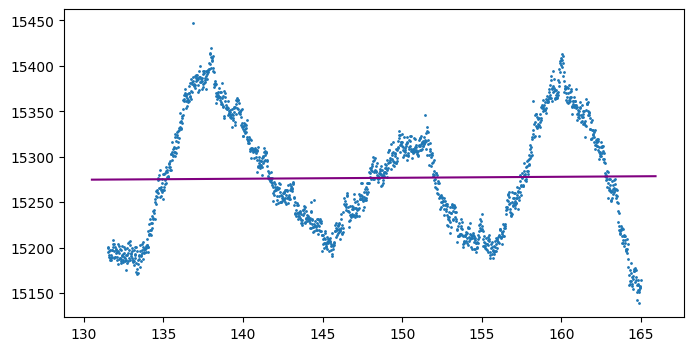

In [ ]:
show(time, flux, 0)

Absolute error:  7.839412552198216
Masked error:  5.456370731507861


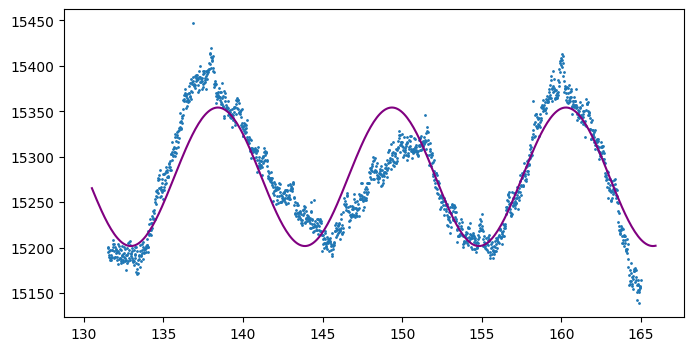

In [ ]:
show(time, flux, 1)

Absolute error:  5.319031086676913
Masked error:  0.13486109264478716


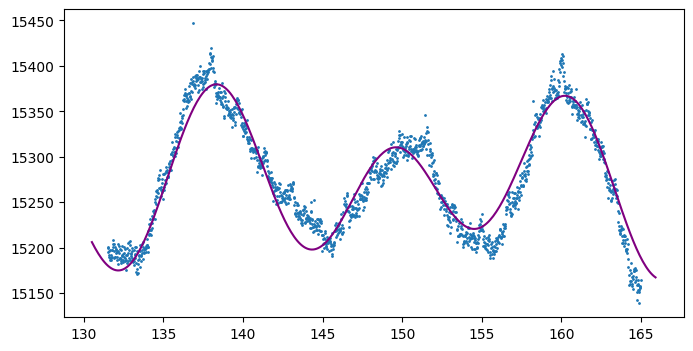

In [ ]:
show(time, flux, 2)

Absolute error:  4.6413802286651356
Masked error:  0.11069619076105891


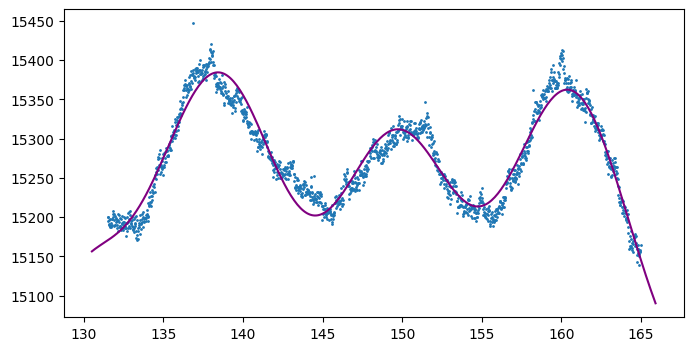

In [ ]:
show(time, flux, 3)

Absolute error:  8.484757308840075
Masked error:  6.276171631095451


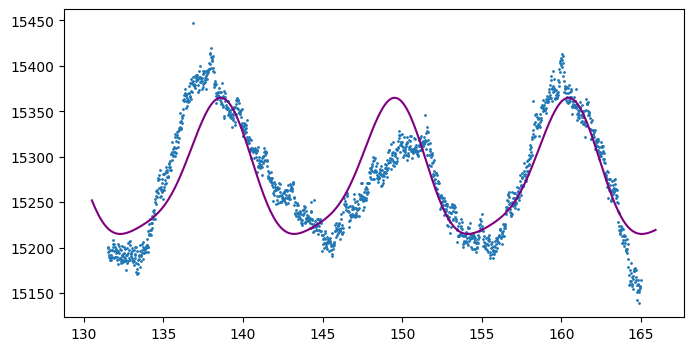

In [ ]:
show(time, flux, -1)

Also we can compare this star lightcurve with its periodogram.

## Apply the algorithm.

In this case we will make the calculation for both normalized and straightforward case. However to improve computation time in the future it's preferible to choose just one.

In [ ]:
def start_predictions():
  information = []
  for index in range(1, 1001):
    try:
      dataframe = pd.read_csv(f"/content/drive/My Drive/Cepheids/fluxes/object{index}.csv")
    except FileNotFoundError:
      print("File "+str(index)+" was not found.")
      continue
    z = np.abs(spicy.stats.zscore(dataframe["flux"]))
    outlier_indices = np.where(z > 2)[0]
    dataframe.drop(outlier_indices, inplace=True)
    lower_values = dataframe[dataframe["flux"] < np.percentile(dataframe["flux"], 2)]
    dataframe.drop(lower_values.index, inplace=True)
    min_time = dataframe["time"].min()
    max_time = dataframe["time"].max()
    min_flux = dataframe["flux"].min()
    max_flux = dataframe["flux"].max()
    normalized_time = normalize(dataframe["time"], min_time, max_time)
    normalized_flux = normalize(dataframe["flux"], min_flux, max_flux)

    try:
      prediction_linearfunc = predict(dataframe["time"], dataframe["flux"], 0)
    except:
      prediction_linearfunc = [None, None, None, None, None]
    try:
      prediction_nomalized_linearfunc = predict(normalized_time, normalized_flux, 0, normalize_errors=True)
    except:
      prediction_nomalized_linearfunc = [None, None, None, None, None]

    try:
      prediction_sinfunc = predict(dataframe["time"], dataframe["flux"], 1)
    except:
      prediction_sinfunc = [None, None, None, None, None, None]
    try:
      prediction_nomalized_sinfunc = predict(normalized_time, normalized_flux, 1, normalize_errors=True)
    except:
      prediction_nomalized_sinfunc = [None, None, None, None, None, None]

    try:
      prediction_skewsin = predict(dataframe["time"], dataframe["flux"], -1)
    except:
      prediction_skewsin = [None, None, None, None, None, None]
    try:
      prediction_nomalized_skewsin = predict(normalized_time, normalized_flux, -1, normalize_errors=True)
    except:
      prediction_nomalized_skewsin  = [None, None, None, None, None, None]

    try:
      prediction_twotrigs = predict(dataframe["time"], dataframe["flux"], 2)
    except:
      prediction_twotrigs = [None, None, None, None, None, None, None, None, None, None]
    try:
      prediction_nomalized_twotrigs = predict(normalized_time, normalized_flux, 2, normalize_errors=True)
    except:
      prediction_nomalized_twotrigs  = [None, None, None, None, None, None, None, None, None, None]

    try:
      prediction_threetrigs = predict(dataframe["time"], dataframe["flux"], 3)
    except:
      prediction_threetrigs = [None, None, None, None, None, None, None, None, None, None, None, None, None]
    try:
      prediction_nomalized_threetrigs = predict(normalized_time, normalized_flux, 3, normalize_errors=True)
    except:
      prediction_nomalized_threetrigs  = [None, None, None, None, None, None, None, None, None, None, None, None, None]

    new_row = {"object":index,
               "min_time":min_time, "max_time":max_time, "min_flux":min_flux, "max_flux":max_flux,
               "linearfunc_error":prediction_linearfunc[0], "linearfunc_maskederror":prediction_linearfunc[1], "linearfunc_amplitude": prediction_linearfunc[2],
               "linearfunc_intercept": prediction_linearfunc[3], "linearfunc_slope": prediction_linearfunc[4],
               "linearfunc_nomalized_error":prediction_nomalized_linearfunc[0], "linearfunc_nomalized_maskederror":prediction_nomalized_linearfunc[1],
               "linearfunc_nomalized_amplitude": prediction_nomalized_linearfunc[2], "linearfunc_nomalized_intercept": prediction_nomalized_linearfunc[3],
               "linearfunc_nomalized_slope": prediction_nomalized_linearfunc[4],

               "sinfunc_error":prediction_sinfunc[0], "sinfunc_maskederror":prediction_sinfunc[1], "sinfunc_amplitude": prediction_sinfunc[2],
               "sinfunc_frequency": prediction_sinfunc[3], "sinfunc_hshift": prediction_sinfunc[4], "sinfunc_mean": prediction_sinfunc[5],
               "sinfunc_nomalized_error":prediction_nomalized_sinfunc[0], "sinfunc_nomalized_maskederror":prediction_nomalized_sinfunc[1],
               "sinfunc_nomalized_amplitude": prediction_nomalized_sinfunc[2], "sinfunc_nomalized_frequency": prediction_nomalized_sinfunc[3],
               "sinfunc_nomalized_hshift": prediction_nomalized_sinfunc[4], "sinfunc_nomalized_mean": prediction_nomalized_sinfunc[5],

               "skewsin_error":prediction_skewsin[0], "skewsin_maskederror":prediction_skewsin[1], "skewsin_amplitude": prediction_skewsin[2],
               "skewsin_frequency": prediction_skewsin[3], "skewsin_hshift": prediction_skewsin[4], "skewsin_mean": prediction_skewsin[5],
               "skewsin_nomalized_error":prediction_nomalized_skewsin[0], "skewsin_nomalized_maskederror":prediction_nomalized_skewsin[1],
               "skewsin_nomalized_amplitude": prediction_nomalized_skewsin[2], "skewsin_nomalized_frequency": prediction_nomalized_skewsin[3],
               "skewsin_nomalized_hshift": prediction_nomalized_skewsin[4], "skewsin_nomalized_mean": prediction_nomalized_skewsin[5],

               "twotrigs_error":prediction_twotrigs[0], "twotrigs_masked_error": prediction_twotrigs[1],
               "twotrigs_mean": prediction_twotrigs[2], "twotrigs_combined_amplitude": prediction_twotrigs[3],
               "twotrigs_amplitude1": prediction_twotrigs[4], "twotrigs_frequency1": prediction_twotrigs[5],
               "twotrigs_hshift1": prediction_twotrigs[6], "twotrigs_amplitude2": prediction_twotrigs[7],
               "twotrigs_frequency2": prediction_twotrigs[8], "twotrigs_hshift2": prediction_twotrigs[9],
               "twotrigs_nomalized_error": prediction_nomalized_twotrigs[0], "twotrigs_nomalized_masked_error": prediction_nomalized_twotrigs[1],
               "twotrigs_nomalized_mean": prediction_nomalized_twotrigs[2], "twotrigs_nomalized_combined_amplitude": prediction_nomalized_twotrigs[3],
               "twotrigs_nomalized_amplitude1": prediction_nomalized_twotrigs[4], "twotrigs_nomalized_frequency1": prediction_nomalized_twotrigs[5],
               "twotrigs_nomalized_hshift1": prediction_nomalized_twotrigs[6], "twotrigs_nomalized_amplitude2": prediction_nomalized_twotrigs[7],
               "twotrigs_nomalized_frequency2": prediction_nomalized_twotrigs[8], "twotrigs_nomalized_hshift2": prediction_nomalized_twotrigs[9],

               "threetrigs_error": prediction_threetrigs[0], "threetrigs_masked_error": prediction_threetrigs[1],
               "threetrigs_mean": prediction_threetrigs[2], "threetrigs_combined_amplitude": prediction_threetrigs[3],
               "threetrigs_amplitude1": prediction_threetrigs[4], "threetrigs_frequency1": prediction_threetrigs[5],
               "threetrigs_hshift1": prediction_threetrigs[6], "threetrigs_amplitude2": prediction_threetrigs[7],
               "threetrigs_frequency2": prediction_threetrigs[8], "threetrigs_hshift2": prediction_threetrigs[9],
               "threetrigs_amplitude3": prediction_threetrigs[10], "threetrigs_frequency3": prediction_threetrigs[11],
               "threetrigs_hshift3": prediction_threetrigs[12], "threetrigs_nomalized_error": prediction_nomalized_threetrigs[0],
               "threetrigs_nomalized_masked_error": prediction_nomalized_threetrigs[1],
               "threetrigs_nomalized_mean": prediction_nomalized_threetrigs[2],
               "threetrigs_nomalized_combined_amplitude": prediction_nomalized_threetrigs[3],
               "threetrigs_nomalized_amplitude1": prediction_nomalized_threetrigs[4],
               "threetrigs_nomalized_frequency1": prediction_nomalized_threetrigs[5],
               "threetrigs_nomalized_hshift1": prediction_nomalized_threetrigs[6],
               "threetrigs_nomalized_amplitude2": prediction_nomalized_threetrigs[7],
               "threetrigs_nomalized_frequency2": prediction_nomalized_threetrigs[8],
               "threetrigs_nomalized_hshift2": prediction_nomalized_threetrigs[9],
               "threetrigs_nomalized_amplitude3": prediction_nomalized_threetrigs[10],
               "threetrigs_nomalized_frequency3": prediction_nomalized_threetrigs[11],
               "threetrigs_nomalized_hshift3": prediction_nomalized_threetrigs[12]
               }
    information.append(new_row)
  dataset = pd.DataFrame.from_dict(information)
  dataset.to_csv("/content/drive/My Drive/Cepheids/new_method_information.csv", index = False)

#start_predictions()


# Analysis of the results.

Linearfunc error:  67.18664220948969
Linearfunc masked error:  17.06185760153883
Sinfunc error:  10.212838779539931
Sinfunc masked error:  17.204191186361292
Skewsin error:  11.72245086757014
Skewsin masked error:  13.995588517613722
2 trigs error:  9.374182447658033
2 trigs masked error:  0.02908200968572848
3 trigs error:  6.855533715323799
3 trigs masked error:  0.027607656038438618


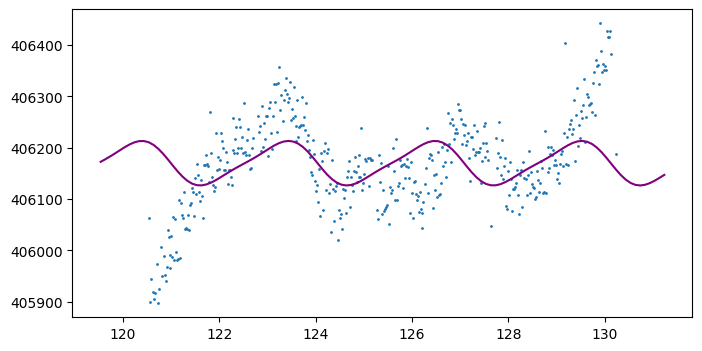



Linearfunc error:  71.82155996497775
Linearfunc masked error:  8.58797848415392
Sinfunc error:  5.871679351565832
Sinfunc masked error:  9.238111657770363
Skewsin error:  10.42249804744974
Skewsin masked error:  25.782591455542327
Optimal parameters fail for index 2

Linearfunc error:  575.3932528768815
Linearfunc masked error:  175.55060465670783
Sinfunc error:  10.370967861999153
Sinfunc masked error:  120.28965614224892
Skewsin error:  13.020771452402624
Skewsin masked error:  158.34837738268362
2 trigs error:  5.769124020421785
2 trigs masked error:  0.16351269269894744
3 trigs error:  10.883881915579737
3 trigs masked error:  0.4563037921668844


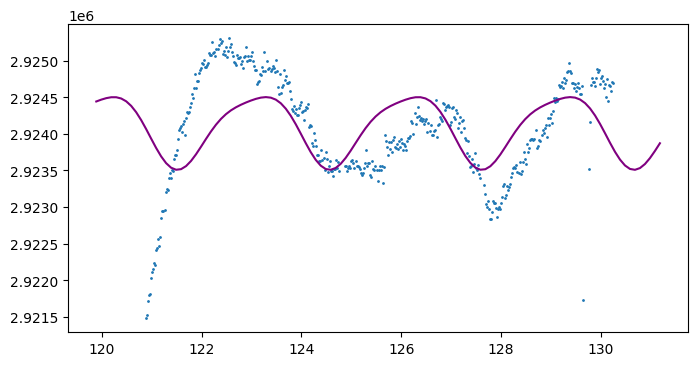



Linearfunc error:  13.431153235933342
Linearfunc masked error:  1.5467162352953026
Sinfunc error:  14.002472201394085
Sinfunc masked error:  4.467990682846945
Skewsin error:  14.762413365228447
Skewsin masked error:  3.819513166242582
2 trigs error:  13.962265539686857
2 trigs masked error:  0.007276177990162765
3 trigs error:  13.959718807342941
3 trigs masked error:  0.007270564584306517


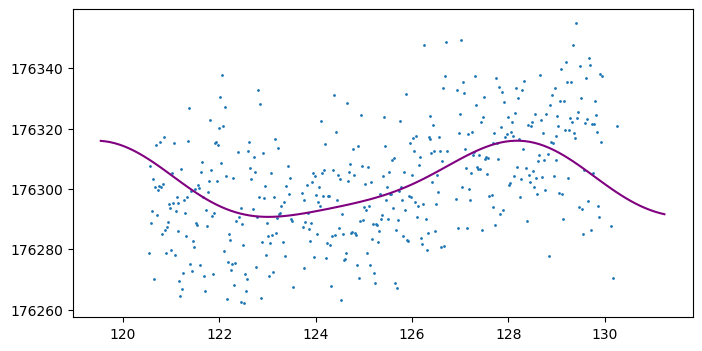



Linearfunc error:  26.62776968576434
Linearfunc masked error:  14.842492645737883
Sinfunc error:  6.243556849771119
Sinfunc masked error:  2.477674295948975
Skewsin error:  10.623931427384466
Skewsin masked error:  6.724104593847718
Optimal parameters fail for index 5

Linearfunc error:  37.15467945510801
Linearfunc masked error:  25.254525946340735
Sinfunc error:  9.884641443920101
Sinfunc masked error:  4.216914423016555
Skewsin error:  9.745246531411658
Skewsin masked error:  4.001837428285114
2 trigs error:  9.734207810654445
2 trigs masked error:  0.033379317522164983
3 trigs error: 

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


 9.747912606469418
3 trigs masked error:  0.03440674350652719


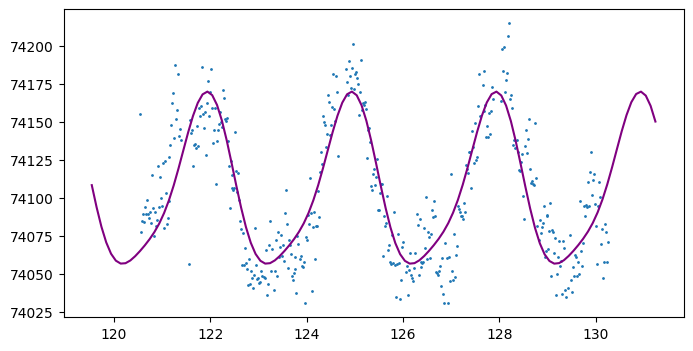



Linearfunc error:  43.810042081334345
Linearfunc masked error:  25.350009775825004
Sinfunc error:  10.630605857693592
Sinfunc masked error:  8.308502395916257
Skewsin error:  10.604581434661084
Skewsin masked error:  8.157324431951293
2 trigs error:  10.571063803002604
2 trigs masked error:  0.07531572679839599
3 trigs error:  15.888677725110359
3 trigs masked error:  0.12078970205674515


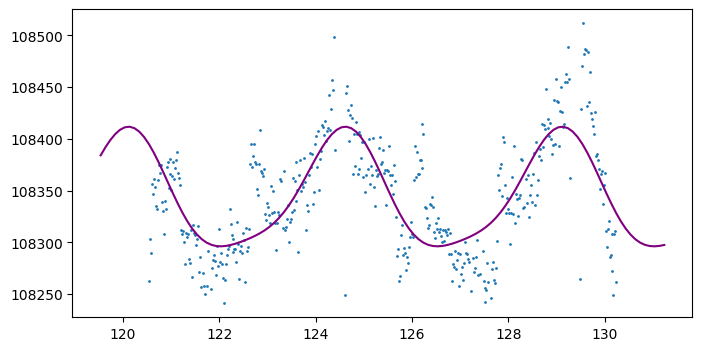



Linearfunc error:  7.863648510798692
Linearfunc masked error:  2.096456148970991
Sinfunc error:  8.183950804890479
Sinfunc masked error:  1.7128686094318006
Skewsin error:  8.248443739191497
Skewsin masked error:  1.6799406948456221
2 trigs error:  8.145679448983032
2 trigs masked error:  0.009605360129078056
3 trigs error:  8.148031631839753
3 trigs masked error:  0.009601190102340408


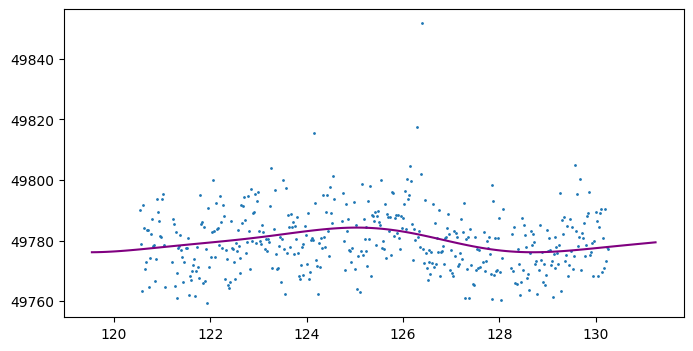



Linearfunc error:  59.428838394343906
Linearfunc masked error:  153.43724553912753
Sinfunc error:  15.206322642219455
Sinfunc masked error:  18.577077743617437
Skewsin error:  14.947374780065967
Skewsin masked error:  17.61396297591295
2 trigs error:  13.459943710880125
2 trigs masked error:  0.39182989359611375
3 trigs error:  6.280423761649748
3 trigs masked error:  0.09123863800630287


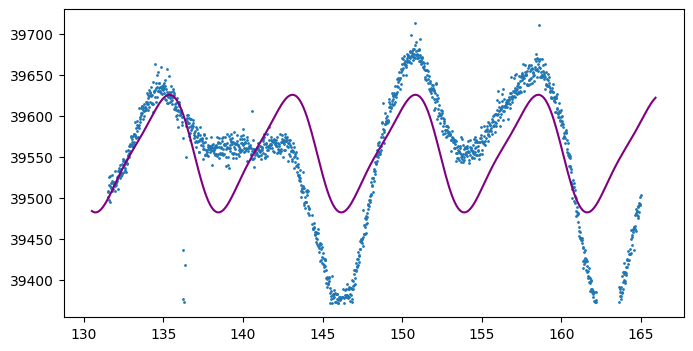



Optimal parameters fail for index 10

Linearfunc error:  7.7062503873287795
Linearfunc masked error:  1.811194719833415
Sinfunc error:  14.526363386892417
Sinfunc masked error:  1.9150778599648735
Skewsin error:  14.846039043397536
Skewsin masked error:  2.054661561875899
2 trigs error:  14.528495633867019
2 trigs masked error:  0.006763002069359313
3 trigs error:  14.535849901735709
3 trigs masked error:  0.006766423643155375


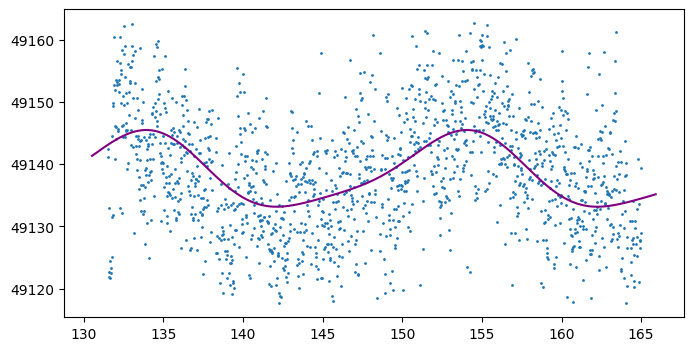



Linearfunc error:  7.698919389067842
Linearfunc masked error:  1.5657030067447468
Sinfunc error:  12.195089136416255
Sinfunc masked error:  2.239132052879607
Skewsin error:  13.932630210812802
Skewsin masked error:  2.3358805806525065
Optimal parameters fail for index 12

Linearfunc error:  73.88862905562476
Linearfunc masked error:  4.708908884240981
Sinfunc error:  7.4189029183259
Sinfunc masked error:  20.47201422437322
Skewsin error:  9.209784069625078
Skewsin masked error:  24.081127560960194
Optimal parameters fail for index 13

Linearfunc error:  22.688254558605244
Linearfunc masked error:  3.3083215321474184
Sinfunc error:  13.839295390550916
Sinfunc masked error:  6.7161297779672315
Skewsin error:  13.50692232497085
Skewsin masked error:  6.411709170778158
2 trigs error:  12.29788920936759
2 trigs masked error:  0.010410350223881636
3 trigs error:  13.157922052667681
3 trigs masked error:  0.011687157365827323


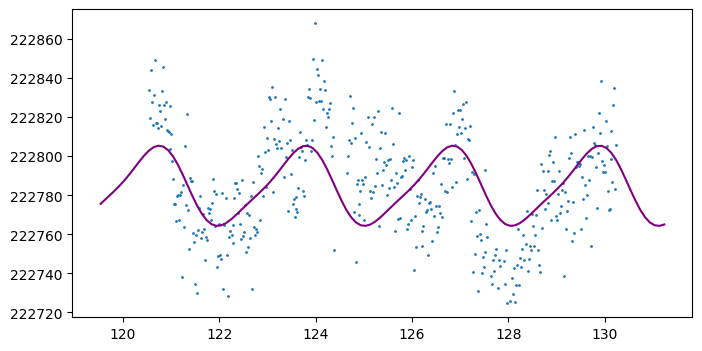



Linearfunc error:  7.9302149812470875
Linearfunc masked error:  2.1553234754813086
Sinfunc error:  9.85727945980062
Sinfunc masked error:  2.036752742800099
Skewsin error:  9.641437351825722
Skewsin masked error:  2.001373906379892
2 trigs error:  9.424445879839723
2 trigs masked error:  0.007523639364350172
3 trigs error:  9.372784095544299
3 trigs masked error:  0.0064912045121561755


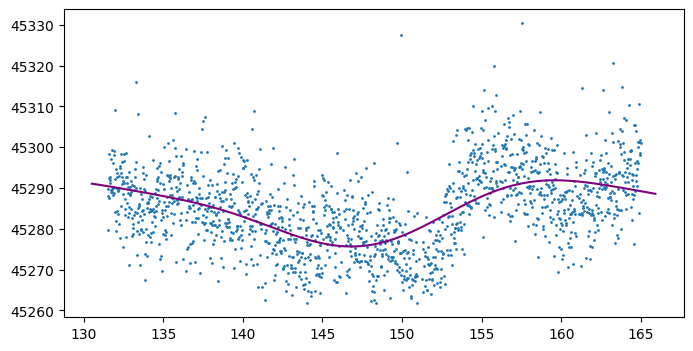



Linearfunc error:  47.854521032167206
Linearfunc masked error:  13.19268117451102
Sinfunc error:  14.572609051869758
Sinfunc masked error:  13.288268175185166
Skewsin error:  15.381476198360607
Skewsin masked error:  6.725468125638422
Optimal parameters fail for index 16

Linearfunc error:  194.3917619750832
Linearfunc masked error:  1866.3731928934408
Sinfunc error:  15.75804134499276
Sinfunc masked error:  40.79080247430132
Skewsin error:  19.032630370024822
Skewsin masked error:  49.29128435172608
2 trigs error:  15.561640394570404
2 trigs masked error:  4.370169276600453
Optimal parameters fail for index 17

Linearfunc error:  8.711071632938081
Linearfunc masked error:  2.0831361552611933
Sinfunc error:  13.173152494875312
Sinfunc masked error:  2.110756114292923
Skewsin error:  12.72424796909393
Skewsin masked error:  2.3008641005148514
2 trigs error:  11.689631400944293
2 trigs masked error:  0.007531640072756825
3 trigs error:  11.760041151794413
3 trigs masked error:  0.00723

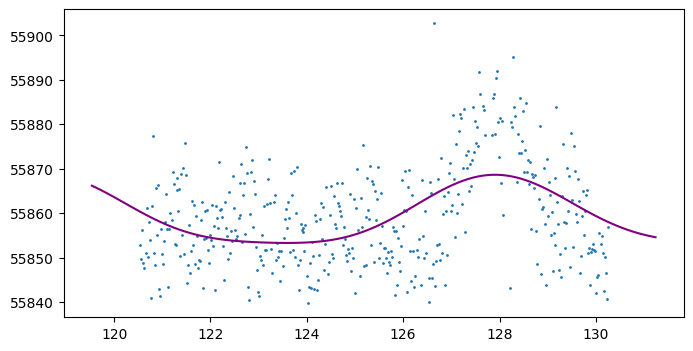



Linearfunc error:  27.12690315778477
Linearfunc masked error:  4.543541062976048
Sinfunc error:  13.47336810424812
Sinfunc masked error:  10.128956007382405
Skewsin error:  13.44244906937326
Skewsin masked error:  8.933439282798057
2 trigs error:  13.392126532710039
2 trigs masked error:  0.021104159472366026
3 trigs error:  13.39627781867975
3 trigs masked error:  0.021271081687120892


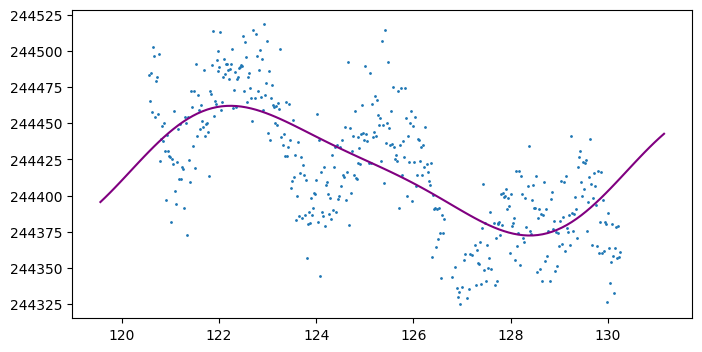



Linearfunc error:  29.02424953544066
Linearfunc masked error:  8.37834199407565
Sinfunc error:  14.020999832857669
Sinfunc masked error:  8.090382501663195
Skewsin error:  14.71446159828227
Skewsin masked error:  8.495153088633549
2 trigs error:  13.315599718108896
2 trigs masked error:  0.02928332864308711
3 trigs error:  11.451605950557571
3 trigs masked error:  0.018076405947960318


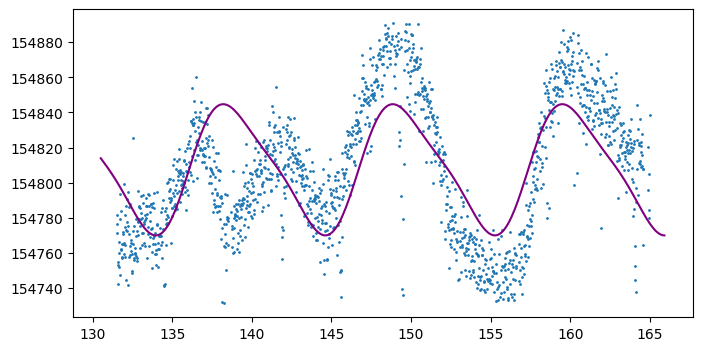

In [54]:
for index in range(1, 21):
  name = f"object{index}"
  dataframe = pd.read_csv(f"/content/drive/My Drive/Cepheids/fluxes/"+name+".csv")
  z = np.abs(spicy.stats.zscore(dataframe["flux"]))
  outlier_indices = np.where(z > 2)[0]
  dataframe.drop(outlier_indices, inplace=True)
  lower_values = dataframe[dataframe["flux"] < np.percentile(dataframe["flux"], 2)]
  dataframe.drop(lower_values.index, inplace=True)
  time = list(dataframe["time"])
  flux = list(dataframe["flux"])
  try:
    show_all(time, flux, -1, normalize_errors=True)
  except RuntimeError:
    print(f"Optimal parameters fail for index {index}")
    print()
    continue

In [ ]:
new_information = pd.read_csv(f"/content/drive/My Drive/Cepheids/new_method_information.csv")
new_information.head(10)

,object,min_time,max_time,min_flux,max_flux,linearfunc_error,linearfunc_maskederror,linearfunc_amplitude,linearfunc_intercept,linearfunc_slope,...,threetrigs_nomalized_combined_amplitude,threetrigs_nomalized_amplitude1,threetrigs_nomalized_frequency1,threetrigs_nomalized_hshift1,threetrigs_nomalized_amplitude2,threetrigs_nomalized_frequency2,threetrigs_nomalized_hshift2,threetrigs_nomalized_amplitude3,threetrigs_nomalized_frequency3,threetrigs_nomalized_hshift3
0,1,120.539119,130.245386,405896.660,406442.720,67.186642,17.061858,4.062370e+05,4.044801e+05,13.489364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,120.538816,130.081651,1034362.060,1035376.600,71.821560,8.587978,1.035224e+06,1.044526e+06,-77.174642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,120.885859,130.244803,2921479.800,2925307.000,575.393253,175.550605,2.924116e+06,2.925040e+06,-7.643319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,120.539155,130.245405,176262.080,176354.890,13.431153,1.546716,1.763182e+05,1.758986e+05,3.221795,...,4.273438,4.273291,0.037613,10.049733,-0.005175,-129.624588,0.960811,-0.003396,125.264814,0.990483
4,5,120.538455,130.244845,69902.830,70112.060,26.627770,14.842493,6.997238e+04,6.961475e+04,2.745826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,120.538528,130.244851,74030.870,74214.730,37.154679,25.254526,7.411254e+04,7.438027e+04,-2.221157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,120.539351,130.245734,108241.070,108511.680,43.810042,25.350010,1.083671e+05,1.077590e+05,4.669176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,120.539794,130.246118,49759.300,49851.746,7.863649,2.096456,4.978077e+04,4.980127e+04,-0.170008,...,9.352642,0.268467,0.033213,18.593933,-9.110717,68.761732,6.044239,-1.483217,-68.758330,6.040228
8,9,131.513013,164.984448,39371.547,39712.676,59.428838,153.437246,3.956757e+04,3.965871e+04,-0.693019,...,4.923625,0.518348,0.212020,25.848847,-0.425982,-279.007926,10.602032,-3.449093,278.842259,10.600903
9,10,120.539147,130.245395,501461.620,501746.750,56.839991,9.123431,5.016472e+05,5.004290e+05,9.352440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_information.shape

(995, 85)

In [ ]:
trad_information = pd.read_csv(f"/content/drive/My Drive/Cepheids/traditional_information.csv")
trad_information.head(10)

,object,min_time,max_time,min_flux,max_flux,error1,masked_error1,error2,masked_error2,error3,...,normalized_combined_amplitude,normalized_amplitude1,normalized_frequency1,normalized_hshift1,normalized_amplitude2,normalized_frequency2,normalized_hshift2,normalized_amplitude3,normalized_frequency3,normalized_hshift3
0,1,120.539119,130.245386,405896.660,406442.720,15.391911,226.854315,16.748688,294.151138,17.589895,...,0.157135,0.110080,19.985567,0.314386,0.080293,13.323712,0.471579,0.078275,26.647423,0.235790
1,2,120.538816,130.081651,1034362.060,1035376.600,29.955297,1580.692020,31.621646,1692.313909,32.434296,...,0.300569,0.275815,6.904111,0.910064,0.109403,13.808221,0.455032,0.047947,20.712332,0.303355
2,3,120.885859,130.244803,2921479.800,2925307.000,14.144878,1641.741536,15.695717,2907.428561,16.843421,...,0.207923,0.141682,19.487903,0.322415,0.114864,6.495968,0.967244,0.099822,25.983871,0.241811
3,4,120.539155,130.245405,176262.080,176354.890,21.042047,57.897595,21.017033,59.476083,21.282052,...,0.148998,0.136400,6.860945,0.915790,0.044599,27.443782,0.228948,0.040080,13.721891,0.457895
4,5,120.538455,130.244845,69902.830,70112.060,16.511089,168.832793,16.304814,170.306297,16.914331,...,0.183835,0.166482,20.488653,0.306667,0.063780,27.318204,0.230000,0.044844,54.636408,0.115000
5,6,120.538528,130.244851,74030.870,74214.730,22.561025,184.789690,23.434688,205.384467,23.757453,...,0.297175,0.274613,20.302814,0.309474,0.083152,40.605628,0.154737,0.077375,27.070419,0.232105
6,7,120.539351,130.245734,108241.070,108511.680,11.635800,84.826229,12.268824,112.232357,12.104277,...,0.220193,0.198755,13.504572,0.465264,0.077313,40.513715,0.155088,0.054811,47.266001,0.132932
7,8,120.539794,130.246118,49759.300,49851.746,8.300743,14.081466,8.335795,19.393612,8.485884,...,0.054758,0.036100,6.752282,0.930528,0.031899,20.256846,0.310176,0.026032,13.504564,0.465264
8,9,131.513013,164.984448,39371.547,39712.676,22.095500,267.364698,19.739035,271.169691,20.354948,...,0.306513,0.224897,26.888901,0.233672,0.192220,13.444451,0.467344,0.080146,6.722225,0.934688
9,10,120.539147,130.245395,501461.620,501746.750,28.192321,369.986802,28.931064,385.173323,30.423191,...,0.310933,0.304879,0.741863,8.469474,0.046872,16.320976,0.384976,0.039127,1.483725,4.234737


In [ ]:
trad_information.shape

(995, 39)

In [ ]:
new_information.columns

Index(['object', 'min_time', 'max_time', 'min_flux', 'max_flux',
       'linearfunc_error', 'linearfunc_maskederror', 'linearfunc_amplitude',
       'linearfunc_intercept', 'linearfunc_slope',
       'linearfunc_nomalized_error', 'linearfunc_nomalized_maskederror',
       'linearfunc_nomalized_amplitude', 'linearfunc_nomalized_intercept',
       'linearfunc_nomalized_slope', 'sinfunc_error', 'sinfunc_maskederror',
       'sinfunc_amplitude', 'sinfunc_frequency', 'sinfunc_hshift',
       'sinfunc_mean', 'sinfunc_nomalized_error',
       'sinfunc_nomalized_maskederror', 'sinfunc_nomalized_amplitude',
       'sinfunc_nomalized_frequency', 'sinfunc_nomalized_hshift',
       'sinfunc_nomalized_mean', 'skewsin_error', 'skewsin_maskederror',
       'skewsin_amplitude', 'skewsin_frequency', 'skewsin_hshift',
       'skewsin_mean', 'skewsin_nomalized_error',
       'skewsin_nomalized_maskederror', 'skewsin_nomalized_amplitude',
       'skewsin_nomalized_frequency', 'skewsin_nomalized_hshift',
 

In [ ]:
trad_information.columns

Index(['object', 'min_time', 'max_time', 'min_flux', 'max_flux', 'error1',
       'masked_error1', 'error2', 'masked_error2', 'error3', 'masked_error3',
       'mean', 'combined_amplitude', 'amplitude1', 'frequency1', 'hshift1',
       'amplitude2', 'frequency2', 'hshift2', 'amplitude3', 'frequency3',
       'hshift3', 'normalized_error1', 'normalized_masked_error1',
       'normalized_error2', 'normalized_masked_error2', 'normalized_error3',
       'normalized_masked_error3', 'normalized_mean',
       'normalized_combined_amplitude', 'normalized_amplitude1',
       'normalized_frequency1', 'normalized_hshift1', 'normalized_amplitude2',
       'normalized_frequency2', 'normalized_hshift2', 'normalized_amplitude3',
       'normalized_frequency3', 'normalized_hshift3'],
      dtype='object')

In [ ]:
new_error1 = new_information["sinfunc_error"].mean()
trad_error1 = trad_information["error1"].mean()
percentage1= 100 - (100*new_error1/trad_error1)
print(new_error1)
print(trad_error1)
print(percentage1,"%")
print()
new_maskederror1 = new_information["sinfunc_maskederror"].mean()**0.5
trad_maskederror1 = trad_information["masked_error1"].mean()**0.5
masked_percentage2= 100 - (100*new_maskederror1/trad_maskederror1)
print(new_maskederror1)
print(trad_maskederror1)
print(masked_percentage2,"%")

14.64393089224981
20.567109438277942
28.799275677525998 %

2.080157566179618
13.364595380855624
84.43531205471899 %


In [ ]:
new_error2 = new_information["twotrigs_error"].mean()
trad_error2 = trad_information["error2"].mean()
percentage2= 100 - (100*new_error2/trad_error2)
print(new_error2)
print(trad_error2)
print(percentage2,"%")
print()
new_maskederror1 = new_information["twotrigs_masked_error"].mean()**0.5
trad_maskederror1 = trad_information["masked_error2"].mean()**0.5
masked_percentage2= 100 - (100*new_maskederror1/trad_maskederror1)
print(new_maskederror1)
print(trad_maskederror1)
print(masked_percentage2,"%")

13.880155174500308
21.305422753967342
34.85153833938524 %

1.4266003444563893
14.464301871906299
90.13709505588207 %


In [ ]:
new_error3 = new_information["threetrigs_error"].mean()
trad_error3 = trad_information["error3"].mean()
percentage3= 100 - (100*new_error3/trad_error3)
print(new_error3)
print(trad_error3)
print(percentage3,"%")
print()
new_maskederror3 = new_information["threetrigs_masked_error"].mean()**0.5
trad_maskederror3 = trad_information["masked_error3"].mean()**0.5
masked_percentage3= 100 - (100*new_maskederror3/trad_maskederror3)
print(new_maskederror3)
print(trad_maskederror3)
print(masked_percentage3,"%")

13.926913760573258
21.65972866647252
35.70134707120789 %

1.4222540229222596
14.912848987271456
90.4628952915959 %
